In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def np_to_th(x):
    n_samples = len(x)
    return torch.from_numpy(x).to(torch.float).to('cpu').reshape(n_samples, -1)

class SimpleNet(nn.Module):

    def __init__(self, input_dim, output_dim, n_units=128, epochs=1000, 
                 loss=nn.MSELoss(), lr=1e-3, phys_loss=None, phys_alpha=0.1):
        super().__init__()

        self.epochs = epochs
        self.loss = loss
        self.phys_loss = phys_loss
        self.phys_alpha = phys_alpha
        self.lr = lr
        self.n_units = n_units

        self.layers = nn.Sequential(
                nn.Linear(input_dim, self.n_units),
                nn.ReLU(),
                nn.Linear(self.n_units, self.n_units),
                nn.ReLU(),
                nn.Linear(self.n_units, self.n_units),
                nn.ReLU(),
                nn.Linear(self.n_units, self.n_units),
                nn.ReLU(),
            )
        self.out = nn.Linear(self.n_units, output_dim)

    def forward(self, x):
        h = self.layers(x)
        out = self.out(h)
        return out
    
    def fit(self, X, y):
        Xt = np_to_th(X)
        yt = np_to_th(y)

        optimiser = torch.optim.Adam(self.parameters(), lr=self.lr)
        self.train()
        losses = []
        for ep in range(self.epochs):
            optimiser.zero_grad()
            outputs = self.forward(Xt)
            loss = self.loss(yt, outputs)
            if self.phys_loss:
                loss += self.phys_phys_alpha + self.phys_phys_alpha * self.phys_loss(self)
            loss.backward()
            optimiser.step()
            losses.append(loss.item())
            if ep % int(self.epochs / 10) == 0:
                print(f"Epoch {ep}/{self.epochs}, loss: {losses[-1]:.2f}")
        return losses

    def predict(self, X):
        self.eval()
        out = self.forward(np_to_th(X))
        return out.detach().cpu().numpy()

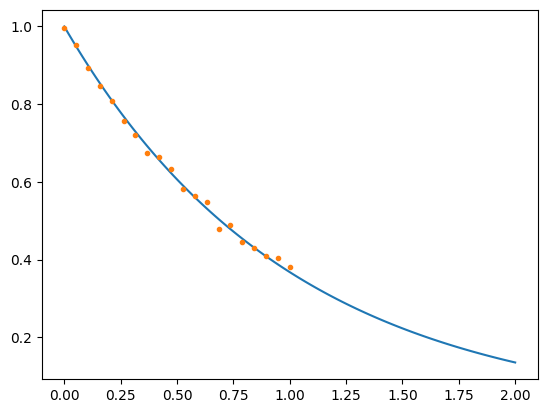

In [3]:
# gen data

test_ts = np.linspace(0, 2.0, 100)
train_ts = np.linspace(0, 1.0, 20)

test = np.exp(-test_ts)
train = np.exp(-train_ts) + np.random.normal(0, 0.01, train_ts.shape)

plt.plot(test_ts, test)
plt.plot(train_ts, train, '.');

Epoch 0/1000, loss: 0.43
Epoch 100/1000, loss: 0.00
Epoch 200/1000, loss: 0.00
Epoch 300/1000, loss: 0.00
Epoch 400/1000, loss: 0.00
Epoch 500/1000, loss: 0.00
Epoch 600/1000, loss: 0.00
Epoch 700/1000, loss: 0.00
Epoch 800/1000, loss: 0.00
Epoch 900/1000, loss: 0.00


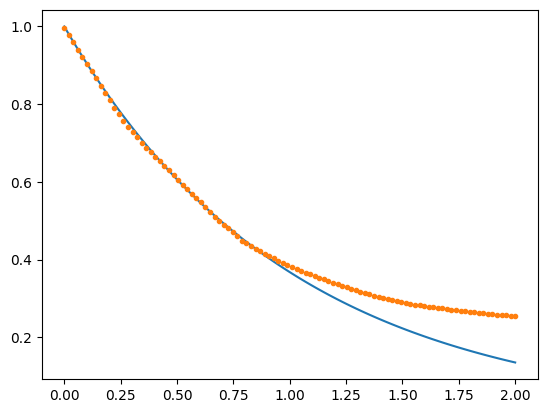

In [4]:
net = SimpleNet(1,1)
losses = net.fit(train_ts, train)
preds = net.predict(test_ts)

plt.plot(test_ts, test)
plt.plot(test_ts, preds, '.');